In [44]:
#import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
#import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
!pip install psychrochart

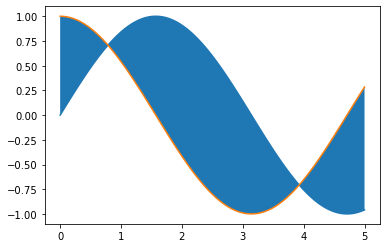

In [45]:
x = np.linspace(0, 5, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.fill_between(x, y1, y2)
plt.show()

C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


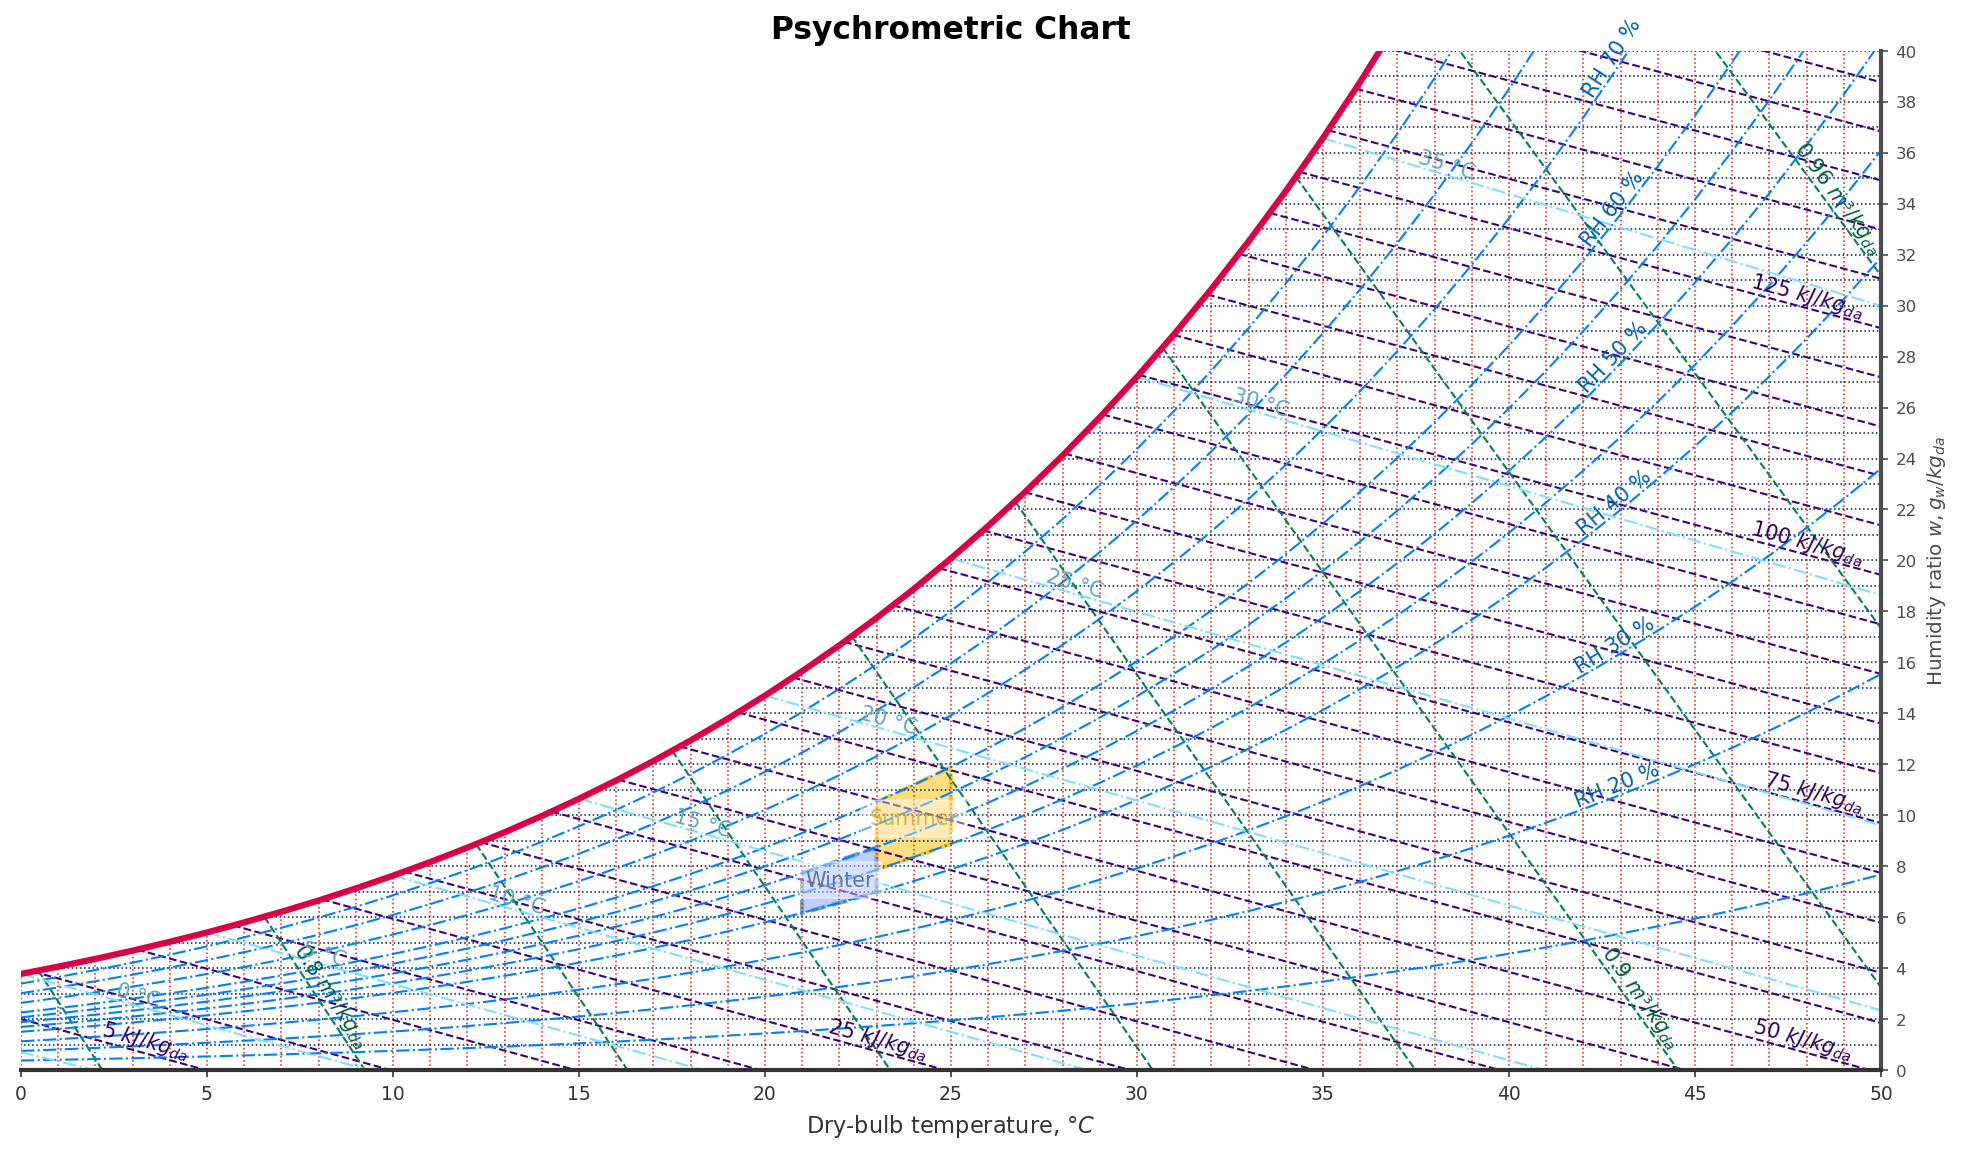

In [9]:
from psychrochart import PsychroChart

chart_default = PsychroChart('default')
ax = chart_default.plot()
ax.get_figure()

In [50]:
from pythermalcomfort.models import pmv_ppd
from pythermalcomfort.models import pmv
from pythermalcomfort.utilities import v_relative, clo_dynamic
#PMVチャート用の関数です。
#計測する乾球温度
temp=[]
pmvc=[]
pmvC=[]
for i in range(0,500,5):
    temp.append(i/10)
def PMVChart(rh):
    #    print (tempDict[roomId])
    #    print (humidityDict[roomId])
        tdb = temp
        tr = temp
        rh = rh
        v = 0.05
        met = 1
        clo = 2.0
        #print (tdb)
        # calculate relative air speed
        v_r = v_relative(v=v, met=met)
        # calculate dynamic clothing
        clo_d = clo_dynamic(clo=clo, met=met)
        results = pmv(tdb=tdb, tr=tr, vr=v_r, rh=rh, met=met, clo=clo_d, limit_inputs=False)
        pmvc.append(results)
        return pmvc
        #その基準に収まる物はどこにあるのか算出
            

In [2]:
from psychrochart import PsychroChart
from psychrochart import load_zones
chart_default = PsychroChart('default')
from psychrochart import load_config
import matplotlib.pyplot as plt
config_style = load_config('default')
#plotする
#領域の情報の公開
config_zone = load_zones()
# 末尾にデータを追加
config_zone['zones'].append(config_zone['zones'][0].copy())

config_zone['zones'].pop() # リストの末尾のデータを削除

#追加したデータの設定01(今後はこれを増やす予定)
point = {'point1': {'label': 'point1',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (CalculateTdb(0)[0], 0)},
         'point2': {'label': 'point2',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (CalculateTdb(0)[1], 0)},
         'point3': {'label': 'point3',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (CalculateTdb(100)[0], 100)},
         'point4': {'label': 'point4',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (CalculateTdb(100)[1], 100)}}

connectors = [{'start': 'point1',
               'end': 'point3',
               'label': 'Process 1',
               'style': {'color': [0.573, 0.106, 0.318, 0.7],
                         "linewidth": 2, "linestyle": "-."}},
              {'start': 'point2',
               'end': 'point4',
               'label': 'Process 2',
               'style': {'color': [0.855, 0.145, 0.114, 0.8],
                         "linewidth": 2, "linestyle": "-."}}]
#ここでチャートの描画
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
##ボアボアの線を引きたかったらこれを使ってね
#chart.plot_points_dbt_rh(point, connectors)
ax.get_figure()

NameError: name 'CalculateTdb' is not defined

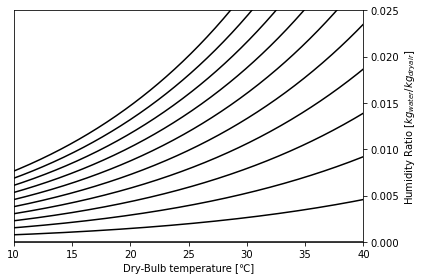

In [35]:
#Youotube from Matplotlib
import psychrolib
import matplotlib.pyplot as plt
import numpy as np

psychrolib.SetUnitSystem(psychrolib.SI)

pressure = 101325

t_array = np.arange(5,45,0.1)
rh_array = np.arange(0,1.1,0.1)
enthalpy_array = np.arange(0,120000,10000)
hr_hor_lines = np.arange(0.005,0.03,0.005)
twb_array = np.arange(-10,45,5)
#箱を生成
f,ax = plt.subplots()
#全体像を生成する。(0℃から45℃の相対湿度の線)
for rh in rh_array:
    rh_array = []
    for t in t_array:
        hr = psychrolib.GetHumRatioFromRelHum(t,rh,pressure)
        rh_array.append(hr)
    ax.plot(t_array,rh_array,"k")
#全体像を生成する。(0℃から45℃の湿球温度の線)
for twb in twb_array:
    hr_array = []
    t_plot_array = []
    for t in t_array:
        if twb <= t:
            #print(twb,t)
            hr = psychrolib.GetHumRatioFromTWetBulb(t,twb,pressure)
            hr_array.append(hr)
            t_plot_array.append(t)
#    ax.plot(t_plot_array,hr_array,"b")
#タイトル等を表示(見せる領域も変化させることが出来る)
ax.set(ylim=(0,0.025),xlim=(10,40),ylabel="Humidity Ratio [$kg_{water}/kg_{dry air}$]",xlabel="Dry-Bulb temperature [℃]")
#ここで向きを変更することが出来る。
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.show()